# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [40]:
!pip install git+https://github.com/CristianLazoQuispe/datautils.git

  Cloning https://github.com/CristianLazoQuispe/datautils.git to /tmp/pip-req-build-awt5z3qv
  Running command git clone --filter=blob:none --quiet https://github.com/CristianLazoQuispe/datautils.git /tmp/pip-req-build-awt5z3qv
  Resolved https://github.com/CristianLazoQuispe/datautils.git to commit 2f5b4933cc2b9b193b46487e674adbd220f3a974
  Preparing metadata (setup.py) ... done


In [41]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install datautils

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


##### Vamos a leer los datos y hacer una exploración preliminar. Para hacer esto debemos bajar algunas librerias necesarias para el trabajo.

In [46]:
# importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datautils.analysis import *
import plotly.express as px
import matplotlib.image as mpimg
%matplotlib inline



In [47]:
#Leer los datos: 
# df_airbnb = pd.read_csv('../data/raw/AB_NYC_2019.csv') # los guarde dentro del gitpod
# df_airbnb = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Curso UTEC\\14_clase 22_06_22\\AB_NYC_2019.csv')# los guardo dentro de mi computadora
df_airbnb = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

In [48]:
# hacer un sample:
df_airbnb.sample(5)

id                                               name   host_id  \
12481   9603991                Homely Apartment For The Holidays!!   6725302   
9708    7461910   Brooklyn Brownstone In Historic Bed Stuy - LEGAL  15539137   
5553    4039789          Harmonious Sanctuary near Yankee Stadium.  20945243   
29060  22342076      Modern style brand new building in Brooklyn!!  75578529   
15865  12832371  East 74th street, Cozy UES 1bd Serviced Apartment  22541573   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
12481     Nancy           Manhattan      Hell's Kitchen  40.76769  -73.98800   
9708    Natasha            Brooklyn  Bedford-Stuyvesant  40.68906  -73.93751   
5553    Michael               Bronx   Concourse Village  40.83331  -73.91742   
29060      Saki            Brooklyn            Flatbush  40.64900  -73.95248   
15865       Ken           Manhattan     Upper East Side  40.77102  -73.95873   

             room_type  price  minimum_nights  number_of_reviews last_review  \
12481  Entire home/apt    200               2                  0         NaN   
9708   Entire home/apt     67               2                149  2019-06-24   
5553   Entire home/apt     90              30                  1  2017-05-12   
29060     Private room     49               2                  0         NaN   
15865  Entire home/apt    163              30                  1  2017-10-14   

       reviews_per_month  calculated_host_listings_count  availability_365  
12481                NaN                               1                 0  
9708                4.08                               1               142  
5553                0.04                               1               358  
29060                NaN                               1                 0  
15865               0.05                              87               350

In [49]:
# averiguando que columnas tienen valores nulos:
# usar la función 'suma' nos mostrará cuántos nulos se encuentran en cada columna en el conjunto de datos
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### En nuestro caso, los datos faltantes que se observan no necesitan demasiado tratamiento especial. Al observar la naturaleza de nuestro conjunto de datos, podemos establecer más cosas: las columnas "name" y "host_name" son irrelevantes e insignificantes para nuestro análisis de datos, las columnas "last_review" y "reviews_per_months" necesitan un manejo muy simple. 

In [11]:
# información del dataset:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##### Despues de cargar los datos podemos observar que en las 16 columnas brindan una gran cantidad de información para la exploración profunda de datos. Ya vemos algunos valores faltantes, que requerirán limpieza y manejo de estos valores. 

##### dentro del dataset tenemos 48.895 observaciones y 16 variables, de las cuales en 4 encontramos valores nulos.
##### tambien se observa que tenemos 3 variables de tipo float64, 7 de tipo int64 y 6 de tipo object.

In [13]:
# cambiar algunas variables de formato:
df_airbnb=df_airbnb.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], format="%Y/%m/%d")
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [13]:
# vemos alguna información del dataset:
round(df_airbnb.describe()) 

id      host_id  latitude  longitude    price  minimum_nights  \
count     48895.0      48895.0   48895.0    48895.0  48895.0         48895.0   
mean   19017143.0   67620011.0      41.0      -74.0    153.0             7.0   
std    10983108.0   78610967.0       0.0        0.0    240.0            21.0   
min        2539.0       2438.0      40.0      -74.0      0.0             1.0   
25%     9471945.0    7822033.0      41.0      -74.0     69.0             1.0   
50%    19677284.0   30793816.0      41.0      -74.0    106.0             3.0   
75%    29152178.0  107434423.0      41.0      -74.0    175.0             5.0   
max    36487245.0  274321313.0      41.0      -74.0  10000.0          1250.0   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count            48895.0            38843.0                         48895.0   
mean                23.0                1.0                             7.0   
std                 45.0                2.0                            33.0   
min                  0.0                0.0                             1.0   
25%                  1.0                0.0                             1.0   
50%                  5.0                1.0                             1.0   
75%                 24.0                2.0                             2.0   
max                629.0               58.0                           327.0   

       availability_365  
count           48895.0  
mean              113.0  
std               132.0  
min                 0.0  
25%                 0.0  
50%                45.0  
75%               227.0  
max               365.0

##### me tira un poco de datos como por ejemplo el precio promedio es de 153 USD, además vemos un precio maximo por día muy elevado (10000). Quizas este dato puede ser manejado como outliers.

In [14]:
# describimos algunas variables:
df_airbnb.describe(include=['object','category','datetime64'])

/tmp/ipykernel_963/3251925174.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_airbnb.describe(include=['object','category','datetime64'])


name host_name neighbourhood_group neighbourhood  \
count            48895     48895               48895         48895   
unique           47906     11453                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21661          3920   
first              NaN       NaN                 NaN           NaN   
last               NaN       NaN                 NaN           NaN   

              room_type          last_review  
count             48895                38843  
unique                3                 1764  
top     Entire home/apt  2019-06-23 00:00:00  
freq              25409                 1413  
first               NaN  2011-03-28 00:00:00  
last                NaN  2019-07-08 00:00:00

In [15]:
#encontrar los host que se llaman Michael.
df_airbnb[df_airbnb['host_name']=='Michael']

id                                            name    host_id  \
151       36121              Lg Rm in Historic Prospect Heights      62165   
412      138216              Sunny and Spacious Designer's Home     674970   
519      189135             Hell's Kitchen Funky 80's Hideaway!     179020   
616      233189             NYC Studio in Heart of Times Square    1220414   
811      289037                2BR in Cobble Hill, Brooklyn, NY     632334   
...         ...                                             ...        ...   
48378  36228909           Sunny SoHo Penthouse w/ Pvt. Terrace!  272485928   
48531  36310247          Spacious 1 Bedroom With Private Garden   25498509   
48786  36426788  Serene Room 5 mins from JFK / 15 mins from LGA  266645207   
48830  36450318    LUXURY, PRIVATE APT ACROSS FROM EMPIRE STATE  151831356   
48889  36484363                              QUIT PRIVATE HOUSE  107716952   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
151     Michael            Brooklyn  Prospect Heights  40.67386  -73.96641   
412     Michael            Brooklyn        Greenpoint  40.72212  -73.94254   
519     Michael           Manhattan    Hell's Kitchen  40.76311  -73.99388   
616     Michael           Manhattan    Hell's Kitchen  40.76166  -73.99675   
811     Michael            Brooklyn   Carroll Gardens  40.68353  -73.99140   
...         ...                 ...               ...       ...        ...   
48378   Michael           Manhattan              SoHo  40.72336  -74.00465   
48531   Michael            Brooklyn      Clinton Hill  40.68183  -73.96464   
48786   Michael              Queens         Laurelton  40.67025  -73.74548   
48830   Michael           Manhattan           Midtown  40.74607  -73.98599   
48889   Michael              Queens           Jamaica  40.69137  -73.80844   

             room_type  price  minimum_nights  number_of_reviews last_review  \
151       Private room     85              15                  9  2013-05-10   
412    Entire home/apt    141               5                  8  2018-07-08   
519       Private room     99               1                 89  2019-07-01   
616    Entire home/apt    179              30                 83  2019-05-31   
811    Entire home/apt    189               2                 13  2016-09-05   
...                ...    ...             ...                ...         ...   
48378  Entire home/apt    600               3                  0         NaT   
48531  Entire home/apt    100               1                  0         NaT   
48786     Private room     75               1                  0         NaT   
48830  Entire home/apt    199               1                  0         NaT   
48889     Private room     65               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  
151                 0.09                               1               339  
412                 0.21                               1                 9  
519                 1.00                               1               353  
616                 0.88                               1               292  
811                 0.18                               1                 0  
...                  ...                             ...               ...  
48378                NaN                               1               179  
48531                NaN                               1                 6  
48786                NaN                               2               180  
48830                NaN                               1                14  
48889                NaN                               2               163  

[417 rows x 16 columns]

##### por lo que vemos michael (host_name) tiene varias propiedades en diferentes barrios (neighbourhood_group)

In [17]:
df_airbnb[df_airbnb['name']=='WEST VILLAGE Bohemian flat in neo-Tudor town house'] 

id                                               name   host_id  \
38250  30156697  WEST VILLAGE Bohemian flat in neo-Tudor town h...  27636707   
38251  30156908  WEST VILLAGE Bohemian flat in neo-Tudor town h...  27636707   
43577  33734483  WEST VILLAGE Bohemian flat in neo-Tudor town h...  27636707   
43984  33982630  WEST VILLAGE Bohemian flat in neo-Tudor town h...  27636707   
46924  35490967  WEST VILLAGE Bohemian flat in neo-Tudor town h...  27636707   

         host_name neighbourhood_group neighbourhood  latitude  longitude  \
38250  Gaia&Pietro           Manhattan  West Village  40.73181  -74.00606   
38251  Gaia&Pietro           Manhattan  West Village  40.73389  -74.00646   
43577  Gaia&Pietro           Manhattan  West Village  40.73326  -74.00511   
43984  Gaia&Pietro           Manhattan  West Village  40.73367  -74.00497   
46924  Gaia&Pietro           Manhattan  West Village  40.73325  -74.00583   

             room_type  price  minimum_nights  number_of_reviews last_review  \
38250  Entire home/apt    300               3                 21  2019-07-01   
38251  Entire home/apt    285               3                 12  2019-07-04   
43577  Entire home/apt    250               3                  5  2019-07-02   
43984  Entire home/apt    250               3                  2  2019-06-20   
46924  Entire home/apt    200               3                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  
38250               5.25                               5               308  
38251               1.76                               5               313  
43577               2.24                               5               255  
43984               0.88                               5               265  
46924                NaN                               5               294

In [16]:
# host_id es el identificador del host, un host puede tener varias propiedades 
df_airbnb[df_airbnb['host_id']==16098958] 

id                                               name   host_id  \
5093    3662724                 5144-Prime Doorman!78ST & Madison   16098958   
5123    3686493                  Irving Place!Doorman!Laundry 5135  16098958   
5286    3819703                        5107-Studio Doorman GYM LuX  16098958   
5357    3867705                   5146-Doorman Pool!1 bedroom View  16098958   
5372    3882103                     5136-Doorman 2 bedroom 3 beds!  16098958   
...         ...                                                ...       ...   
42604  33070416          Prime 1 bedroom Doorman Gym RoofDeck 5221  16098958   
42605  33071794         Prime Location 44stDoorman Gym Studio!5217  16098958   
42609  33072686       Prime Location One Bed Doorman Gym Deck!5223  16098958   
42611  33072804  34th and 6th Ave - Doorman Gym Roofdeck 1 bed ...  16098958   
42925  33339676    Sunny Large Studio Elevator Doorman Gym UN 5226  16098958   

            host_name neighbourhood_group    neighbourhood  latitude  \
5093   Jeremy & Laura           Manhattan  Upper East Side  40.77448   
5123   Jeremy & Laura           Manhattan         Gramercy  40.73632   
5286   Jeremy & Laura           Manhattan  Upper West Side  40.79082   
5357   Jeremy & Laura           Manhattan  Upper West Side  40.79370   
5372   Jeremy & Laura           Manhattan   Hell's Kitchen  40.76665   
...               ...                 ...              ...       ...   
42604  Jeremy & Laura           Manhattan          Midtown  40.74885   
42605  Jeremy & Laura           Manhattan          Midtown  40.75032   
42609  Jeremy & Laura           Manhattan   Hell's Kitchen  40.76291   
42611  Jeremy & Laura           Manhattan          Midtown  40.74909   
42925  Jeremy & Laura           Manhattan          Midtown  40.75191   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
5093   -73.96102  Entire home/apt    175              30                  2   
5123   -73.98475  Entire home/apt    175              30                  0   
5286   -73.97452  Entire home/apt    140              30                  4   
5357   -73.96590  Entire home/apt    185              30                  2   
5372   -73.98660  Entire home/apt    250              30                  0   
...          ...              ...    ...             ...                ...   
42604  -73.98698  Entire home/apt    260              30                  1   
42605  -73.97143  Entire home/apt    175              30                  0   
42609  -73.98750  Entire home/apt    250              30                  0   
42611  -73.98657  Entire home/apt    170              30                  1   
42925  -73.96980  Entire home/apt    140              30                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
5093   2019-05-30               0.06                              96   
5123          NaT                NaN                              96   
5286   2017-09-04               0.09                              96   
5357   2018-07-16               0.13                              96   
5372          NaT                NaN                              96   
...           ...                ...                             ...   
42604  2019-05-06               0.46                              96   
42605         NaT                NaN                              96   
42609         NaT                NaN                              96   
42611  2019-05-12               0.51                              96   
42925         NaT                NaN                              96   

       availability_365  
5093                281  
5123                312  
5286                342  
5357                310  
5372                281  
...                 ...  
42604               343  
42605               342  
42609               303  
42611               345  
42925               311  

[96 rows x 16 columns]

##### en este caso filtre por host, y observamos todas las propiedades que tiene.

In [14]:
# me dice los datos únicos que tiene el dataset 
df_airbnb['id'].nunique()

48895

In [16]:
# cantidad de Host 
print('Cantidad de hosts:', df_airbnb['host_id'].nunique())

Cantidad de hosts: 37457



##### De la descripción anterior se obtiene que existen 37.457 host que ofrecen 47.905 alojamientos, por lo que podemos afirmar que algún host administra varios alojamientos. 
##### quiere decir que un host puede tener varios alojamientos. Esto lo vimos más arriba.

In [18]:
df_airbnb.groupby(['host_id', 'name']).size().sort_values(ascending=False)

host_id    name                                              
134184451  Hillside Hotel                                        18
417504     Loft Suite @ The Box House Hotel                      11
230192510  Artsy Private BR in Fort Greene Cumberland            10
76104209   IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
27636707   WEST VILLAGE Bohemian flat in neo-Tudor town house     5
                                                                 ..
13347167   Fabulous Apartment with Soaking Tub                    1
           Fabulous Apt w/ Gorgeous Bathroom!                     1
           GORGEOUS Newly-Renovated 2-BR Flat                     1
           Gorgeous 1 Bedroom Apartment                           1
274321313  Spacious Room w/ Private Rooftop, Central location     1
Length: 48652, dtype: int64

##### Lo que hice fue filtrar los diferentes host_id y los nombres y vemos cuantos tienen cada uno.
##### El que mas tiene es "Hillside Hotel que tiene 18 alojamientos.

In [17]:
# empezamos a ver que tipos de alojamientos tenemos:
print('Tipos de alojamientos')
df_airbnb['room_type'].value_counts(normalize=True)

Tipos de alojamientos


Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

##### Aquí lo vemos en porcentajes y vemos que Shared room son muy pocos el 2,4%. Los demas se distribuye de manera bastante equitativa entre Entire home/apt y Private room.

In [50]:
df_airbnb['room_type'].nunique()

3

In [51]:
#examinar los valores únicos de room_type ya que esta columna será muy útil para un análisis posterior
df_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)



##### Con respecto a las características de los alojamientos se puede decir que existen tres tipos de 'espacios' ofrecidos, siendo el alojamiento entero el más ofrecido.

In [52]:
# Top 10 host
df_airbnb['host_id'].value_counts(sort=True)[:10] 

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [53]:
# #volviendo a nuestro conjunto de datos, podemos confirmar nuestros hallazgos con la columna ya existente llamada 'calculated_host_listings_count'
top_host_check=df_airbnb.calculated_host_listings_count.max()
top_host_check

327

In [54]:
df_airbnb.groupby('host_id')[['number_of_reviews','id']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean']}).sort_values(by=('id','nunique'),ascending=False)[0:10] # Top 10 host

id number_of_reviews          
          nunique               sum      mean
host_id                                      
219517861     327              1281  3.917431
107434423     232                29  0.125000
30283594      121                65  0.537190
137358866     103                87  0.844660
16098958       96               138  1.437500
12243051       96                43  0.447917
61391963       91               417  4.582418
22541573       87                55  0.632184
200380610      65                 1  0.015385
1475015        52               162  3.115385

In [55]:
df_hn=round(df_airbnb.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

id number_of_reviews       price
                              nunique               sum mean   mean
host_id   neighbourhood_group                                      
219517861 Manhattan               327              1281  4.0  253.0
107434423 Manhattan               230                29  0.0  303.0
30283594  Manhattan               121                65  1.0  278.0
12243051  Manhattan                96                43  0.0  213.0
16098958  Manhattan                96               138  1.0  209.0
61391963  Manhattan                91               417  5.0  146.0
22541573  Manhattan                86                54  1.0  216.0
137358866 Queens                   79                54  1.0   44.0
200380610 Manhattan                65                 1  0.0  290.0
1475015   Manhattan                52               162  3.0  103.0

#### aqui lo que hicimos fue agrupar los datos por host_id y neighbourhood_group y vemos la cantidad de propiedades que tiene cada host en que barrio y vemos la cantidad de reviews que tuvo así como el precio medio de alquiler.

In [56]:
list(df_hn.reset_index()['host_id'])
df_hn_filt=df_airbnb[df_airbnb['host_id'].isin(list(df_hn.reset_index()['host_id']))]
df_hn_filt

id                                               name    host_id  \
1386     613556                2 BED TriBeCa, Beautiful-Renovated!    1475015   
1454     652371                ELEGANT MIDTOWN EAST STUDIO E.52 ST    1475015   
1455     652466  32nd St & Lexington Ave / Doorman Beautiful St...    1475015   
1456     652515                 COLUMBUS CIRCLE~FULLY FURNISHED!!!    1475015   
1457     652648                GRAMERCY PARK~FURNISHED E.20's ST P    1475015   
...         ...                                                ...        ...   
48723  36404684  Smart Nolita 1BR w/ W/D near famous cafes by B...  107434423   
48724  36404784  Dapper Hell's Kitchen 2BR w/  Gym + W/D + Door...  107434423   
48725  36404815  Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...  107434423   
48726  36404936  Beautiful Williamsburg 2BR w/ Skyline views + ...  107434423   
48727  36404972  Hip East Village 1BR w/ Gym, W/D, Doorman, nea...  107434423   

        host_name neighbourhood_group   neighbourhood  latitude  longitude  \
1386         Mike           Manhattan         Tribeca  40.71655  -74.01171   
1454         Mike           Manhattan         Midtown  40.75743  -73.96939   
1455         Mike           Manhattan        Kips Bay  40.74190  -73.98160   
1456         Mike           Manhattan  Hell's Kitchen  40.76758  -73.98722   
1457         Mike           Manhattan        Kips Bay  40.74189  -73.97833   
...           ...                 ...             ...       ...        ...   
48723  Blueground           Manhattan          Nolita  40.72283  -73.99472   
48724  Blueground           Manhattan  Hell's Kitchen  40.76082  -73.99709   
48725  Blueground           Manhattan  Hell's Kitchen  40.76083  -73.99727   
48726  Blueground            Brooklyn    Williamsburg  40.71493  -73.96365   
48727  Blueground           Manhattan    East Village  40.73206  -73.98776   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1386   Entire home/apt    130              30                  2  2015-10-31   
1454   Entire home/apt     90              30                  3  2016-12-31   
1455   Entire home/apt    100              30                  2  2018-06-30   
1456   Entire home/apt     85              30                  2  2016-08-15   
1457   Entire home/apt     87              30                  3  2018-08-15   
...                ...    ...             ...                ...         ...   
48723  Entire home/apt    316              30                  0         NaN   
48724  Entire home/apt    385              30                  0         NaN   
48725  Entire home/apt    267              30                  0         NaN   
48726  Entire home/apt    278              30                  0         NaN   
48727  Entire home/apt    365              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
1386                0.03                              52               116  
1454                0.05                              52               358  
1455                0.04                              52               342  
1456                0.04                              52               223  
1457                0.05                              52               363  
...                  ...                             ...               ...  
48723                NaN                             232               325  
48724                NaN                             232               338  
48725                NaN                             232               228  
48726                NaN                             232               188  
48727                NaN                             232               295  

[1270 rows x 16 columns]

#### filtramos los datos por el host_id 

In [57]:
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=['host_id',('id','nunique')],ascending=False).dropna()) # Top 10 host

id number_of_reviews  \
                                                 nunique               sum   
host_id   neighbourhood_group neighbourhood                                  
219517861 Manhattan           Financial District     218              1129   
                              Murray Hill             50               141   
                              Theater District        27                 6   
                              Hell's Kitchen          15                 3   
                              Chelsea                  7                 0   
                              Upper East Side          6                 2   
                              Midtown                  4                 0   
200380610 Manhattan           Midtown                 17                 0   
                              Upper East Side         10                 0   
                              Hell's Kitchen           9                 0   
                              Upper West Side          6                 0   
                              Chelsea                  5                 1   
                              Murray Hill              5                 0   
                              Theater District         4                 0   
                              East Village             2                 0   
                              Gramercy                 2                 0   
                              Kips Bay                 2                 0   
                              West Village             2                 0   
                              Battery Park City        1                 0   
137358866 Queens              Woodside                35                22   
                              Sunnyside               17                14   
          Manhattan           Harlem                  12                18   
          Queens              Elmhurst                10                11   
                              Astoria                  9                 2   
          Brooklyn            Bushwick                 6                 6   
          Manhattan           East Harlem              6                 9   
          Queens              Jackson Heights          4                 3   
                              Maspeth                  3                 2   
                              Long Island City         1                 0   
107434423 Manhattan           Chelsea                 37                 7   
                              Tribeca                 30                 3   
                              Theater District        27                 2   
                              Financial District      25                 4   
                              Upper West Side         17                 2   
                              East Village            14                 1   
                              Kips Bay                14                 1   
                              West Village            14                 1   
                              Midtown                 13                 1   
                              Hell's Kitchen          10                 1   
                              Upper East Side         10                 3   
                              Murray Hill              9                 2   
                              Battery Park City        2                 1   
                              Flatiron District        2                 0   
                              Nolita                   2                 0   
          Brooklyn            DUMBO                    1                 0   
                              Williamsburg             1                 0   
          Manhattan           Gramercy                 1                 0   
                              Lower East Side          1                 0   
                              NoHo                     1                 0  

##### aqui filtramos los datos por 'host_id','neighbourhood_group','neighbourhood' poniendo el numero de review y la media de precios.
##### Podemos observar que en Manhatan tenemos la media de precios mas alta y en Queens la más baja. 

In [58]:
#como vimos anteriormente de los valores únicos para el vecindario, hay demasiados para concentrarse;
#por lo tanto, tomemos solo los 10 vecindarios principales que tienen la mayor cantidad de listados en ellos.
# describir los 10 mejores barrios.
df_airbnb[['neighbourhood_group','neighbourhood']].value_counts(sort=True)[:10]

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
dtype: int64

##### Aquí podemos observar qeu en Brooklyn Williamsburg es donde tenemos mas propiedades y en Manhattan Midtown tenemos menos propiedades.

In [59]:
# agrupar los datos por barrios y poder ver el precio promedio:
df_nei=df_airbnb.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [60]:
df_nei.reset_index(inplace=True)


In [61]:
#examinar los valores únicos de neighbourhood_group ya que esta columna parecerá muy útil para un análisis posterior
list(df_nei.neighbourhood_group.unique())

['Staten Island', 'Queens', 'Manhattan', 'Brooklyn', 'Bronx']

In [62]:
# examinar valores únicos de neighbourhood ya que parece ser una variable importante.
len(df_airbnb.neighbourhood.unique())

221

In [63]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))

neighbourhood_group   neighbourhood  price
0       Staten Island  Fort Wadsworth  800.0
1       Staten Island         Woodrow  700.0
2       Staten Island    Prince's Bay  409.5
3       Staten Island   Randall Manor  336.0
4       Staten Island     Willowbrook  249.0

neighbourhood_group    neighbourhood       price
43              Queens         Neponsit  274.666667
44              Queens     Breezy Point  213.333333
45              Queens  Jamaica Estates  182.947368
46              Queens          Arverne  171.779221
47              Queens     Belle Harbor  171.500000

neighbourhood_group      neighbourhood       price
94           Manhattan            Tribeca  490.638418
95           Manhattan  Battery Park City  367.557143
96           Manhattan  Flatiron District  341.925000
97           Manhattan               NoHo  295.717949
98           Manhattan               SoHo  287.103352

neighbourhood_group     neighbourhood       price
126            Brooklyn          Sea Gate  487.857143
127            Brooklyn       Cobble Hill  211.929293
128            Brooklyn  Brooklyn Heights  209.064935
129            Brooklyn             DUMBO  196.305556
130            Brooklyn      Vinegar Hill  187.176471

neighbourhood_group   neighbourhood       price
173               Bronx       Riverdale  442.090909
174               Bronx     City Island  173.000000
175               Bronx  Spuyten Duyvil  154.750000
176               Bronx     Eastchester  141.692308
177               Bronx       Unionport  137.142857

##### Mirando los primeros 5 vemos que Staten Island Fort Wadsworth es donde vemos el precio más alto, Queens Belle Harbor vemos el más bajo. Tambien podemos observar que Manhatan tiene los precios mas altas de los diferentes neighbourhood group

In [32]:
# mostrar las últimas 5 filas: 
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))


neighbourhood_group   neighbourhood      price
38       Staten Island         Concord  58.192308
39       Staten Island      Grant City  57.666667
40       Staten Island  New Dorp Beach  57.400000
41       Staten Island        New Dorp  57.000000
42       Staten Island     Bull's Head  47.333333

neighbourhood_group neighbourhood      price
89              Queens     Ridgewood  77.184397
90              Queens      Rosedale  76.694915
91              Queens   Little Neck  75.200000
92              Queens     Woodhaven  67.170455
93              Queens        Corona  59.171875

neighbourhood_group        neighbourhood       price
121           Manhattan  Morningside Heights  114.783237
122           Manhattan     Roosevelt Island  113.259740
123           Manhattan   Washington Heights   89.610679
124           Manhattan          Marble Hill   89.166667
125           Manhattan               Inwood   88.896825

neighbourhood_group neighbourhood      price
168            Brooklyn       Midwood  80.339450
169            Brooklyn     Gravesend  79.014706
170            Brooklyn   Brownsville  76.459016
171            Brooklyn   Bensonhurst  75.786667
172            Brooklyn  Borough Park  63.066176

neighbourhood_group neighbourhood      price
216               Bronx    Mount Eden  58.500000
217               Bronx     Bronxdale  57.105263
218               Bronx     Soundview  53.466667
219               Bronx       Tremont  51.545455
220               Bronx   Hunts Point  50.500000

##### mirando de las últimas filas el precio más bajo lo tiene Staten Island Bull's Head y el más alto lo tiene Manhattan Morningside Heights.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

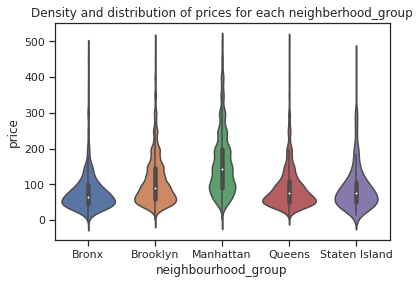

In [33]:
# podemos hacer una visualizacion eliminando los datos extremos.

#creamos a sub-dataframe con valores no extremos / menos que 500
sub_df=df_airbnb[df_airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

##### podemos afirmar que Manhattan tiene el rango de precios más alto para los listados con un precio promedio de $150, seguido de Brooklyn con $90 por noche. Queens y Staten Island parecen tener distribuciones muy similares, Bronx es el más barato de todos. 

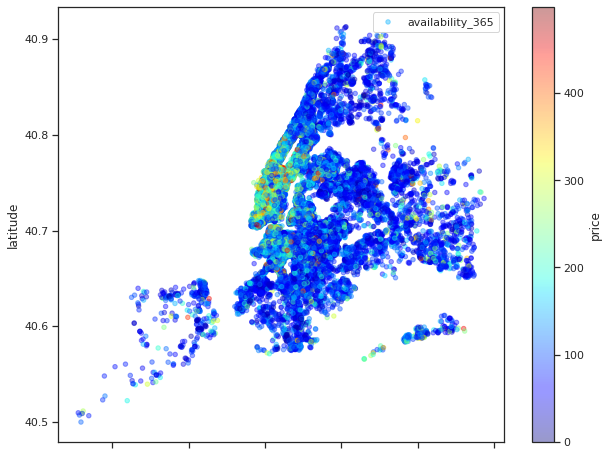

In [34]:
# ahora aplicamos longitud y latitud 

# diagrama de dispersión
# usando para precios menores de 500 vemos las disponibilidades
viz_4=sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

##### El diagrama de dispersión funcionó bien para mostrar nuestros puntos de latitud y longitud. Sin embargo, sería bueno tener un mapa de calor. 

In [64]:
fig=px.scatter_mapbox(df_airbnb, lat='latitude', lon='longitude', mapbox_style='open-street-map', width=700, height=700)
fig.show()


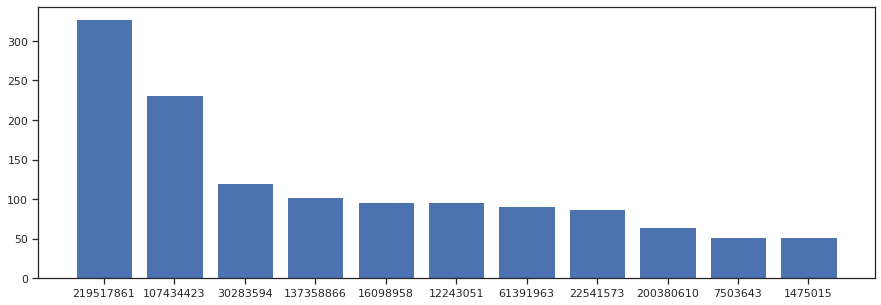

In [35]:
histogramas_de_host_aux = df_airbnb['host_id'].value_counts()

histogramas_de_host = pd.DataFrame(histogramas_de_host_aux.values, columns=['frecuencia'])
histogramas_de_host['host_id']=histogramas_de_host_aux.index

fig=plt.figure(figsize=(15,5))
histogramas_de_host_aux2 =histogramas_de_host[histogramas_de_host['frecuencia'] > 50]

plt.bar(histogramas_de_host_aux2['host_id'].astype(str),histogramas_de_host_aux2['frecuencia'])
plt.show()

# cantidad de veces que aparce el host id, el host que tiene mas alquileres en alguna de sus propiedades.

##### Interesante, podemos ver que hay una buena distribución entre los 10 principales hosts con la mayor cantidad de listados. El primero tiene más de 300 listados.

In [36]:
# sacar los precios 0 porque me puede distorcionar la media.
np.sum(df_airbnb['price']==0)

11

In [37]:
# saque los precios en 0 
df=df_airbnb[df_airbnb['price']!=0]

In [38]:
np.sum(df['price']==0)

0

In [39]:
round(df.describe()) # no fue interesante el analisis dado que me dio el mismo promedio al ser la cantidad muy baja de las propiedades que tenían precio 0 (solo 11).

id      host_id  latitude  longitude    price  minimum_nights  \
count     48884.0      48884.0   48884.0    48884.0  48884.0         48884.0   
mean   19016793.0   67622035.0      41.0      -74.0    153.0             7.0   
std    10984315.0   78616662.0       0.0        0.0    240.0            21.0   
min        2539.0       2438.0      40.0      -74.0     10.0             1.0   
25%     9470548.0    7817310.0      41.0      -74.0     69.0             1.0   
50%    19675740.0   30792574.0      41.0      -74.0    106.0             3.0   
75%    29152967.0  107434423.0      41.0      -74.0    175.0             5.0   
max    36487245.0  274321313.0      41.0      -74.0  10000.0          1250.0   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count            48884.0            38833.0                         48884.0   
mean                23.0                1.0                             7.0   
std                 45.0                2.0                            33.0   
min                  0.0                0.0                             1.0   
25%                  1.0                0.0                             1.0   
50%                  5.0                1.0                             1.0   
75%                 24.0                2.0                             2.0   
max                629.0               58.0                           327.0   

       availability_365  
count           48884.0  
mean              113.0  
std               132.0  
min                 0.0  
25%                 0.0  
50%                45.0  
75%               227.0  
max               365.0

In [40]:
# precio promedio por barrio:
df_airbnb_N=(df_airbnb[['price','neighbourhood_group','longitude','latitude']].groupby(['neighbourhood_group']).mean())
df_airbnb_N

price  longitude   latitude
neighbourhood_group                                  
Bronx                 87.496792 -73.884552  40.848305
Brooklyn             124.383207 -73.951190  40.685036
Manhattan            196.875814 -73.974607  40.765062
Queens                99.517649 -73.872775  40.731531
Staten Island        114.812332 -74.105805  40.610225

In [42]:
df_airbnb_N

price  longitude   latitude
neighbourhood_group                                  
Bronx                 87.496792 -73.884552  40.848305
Brooklyn             124.383207 -73.951190  40.685036
Manhattan            196.875814 -73.974607  40.765062
Queens                99.517649 -73.872775  40.731531
Staten Island        114.812332 -74.105805  40.610225

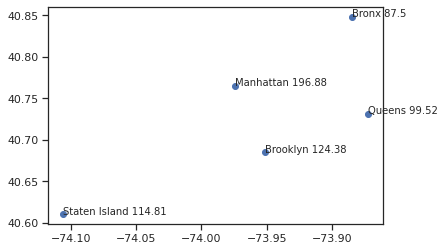

In [43]:
# graficar los precios promedios:
fig=plt.figure()
plt.plot(df_airbnb_N['longitude'],df_airbnb_N['latitude'],"o")
for i in range (len(df_airbnb_N)):
    texto = df_airbnb_N.index[i] +  " " + str(np.round(df_airbnb_N['price'].iloc[ i ],2))
    x = df_airbnb_N["longitude"].iloc[ i ]
    y = df_airbnb_N["latitude"].iloc[ i ]
    plt.annotate( texto, ( x, y) )

##### podemos observar que los precios promedios más altos estan en Manhattan (filtrando por neighbourhood_group)

In [44]:
# vemos la columna reviews_per_month que es la cantidad de reviews por mes.
df_airbnb['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [45]:
df_airbnb_N=(df_airbnb[['reviews_per_month','neighbourhood_group','longitude','latitude']].groupby(['neighbourhood_group']).mean())
df_airbnb_N

reviews_per_month  longitude   latitude
neighbourhood_group                                         
Bronx                         1.837831 -73.884552  40.848305
Brooklyn                      1.283212 -73.951190  40.685036
Manhattan                     1.272131 -73.974607  40.765062
Queens                        1.941200 -73.872775  40.731531
Staten Island                 1.872580 -74.105805  40.610225

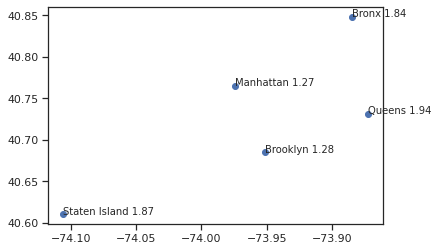

In [46]:
fig=plt.figure()
plt.plot(df_airbnb_N['longitude'],df_airbnb_N['latitude'],"o")
for i in range (len(df_airbnb_N)):
    texto = df_airbnb_N.index[i] +  " " + str(np.round(df_airbnb_N['reviews_per_month'].iloc[ i ],2))
    x = df_airbnb_N["longitude"].iloc[ i ]
    y = df_airbnb_N["latitude"].iloc[ i ]
    plt.annotate( texto, ( x, y) )

##### Aqui podemos observar que las mayores review_per_month la tiene Queens y la menor la tiene Manhattan y Brooklyn. Pomos observar que uno de los neighbourhood_group con mayor precio promedio es el que tiene menor review_per_month.

In [38]:
df_hn=round(df_airbnb.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('number_of_reviews','mean'),ascending=False))[0:10] # Top 10 host
df_hn


id number_of_reviews         price
                             nunique               sum   mean   mean
host_id  neighbourhood_group                                        
47621202 Queens                  2.0              1205  602.0   47.0
4734398  Manhattan               3.0              1798  599.0   49.0
2369681  Manhattan               1.0               540  540.0   99.0
12949460 Brooklyn                1.0               488  488.0  160.0
792159   Brooklyn                1.0               480  480.0   60.0
37312959 Queens                  5.0              2273  455.0   43.0
2321321  Queens                  1.0               454  454.0   39.0
277379   Manhattan               2.0               897  448.0   72.0
307962   Queens                  1.0               441  441.0   99.0
97086824 Queens                  1.0               434  434.0   49.0

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



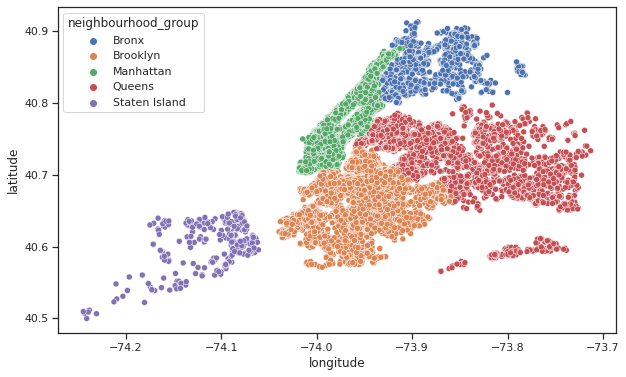

In [39]:
# Map of Neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.ioff()

##### Aqui estamos observando en base a la latitud y longitud las diferentes propiedades por Neighbourhood group.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



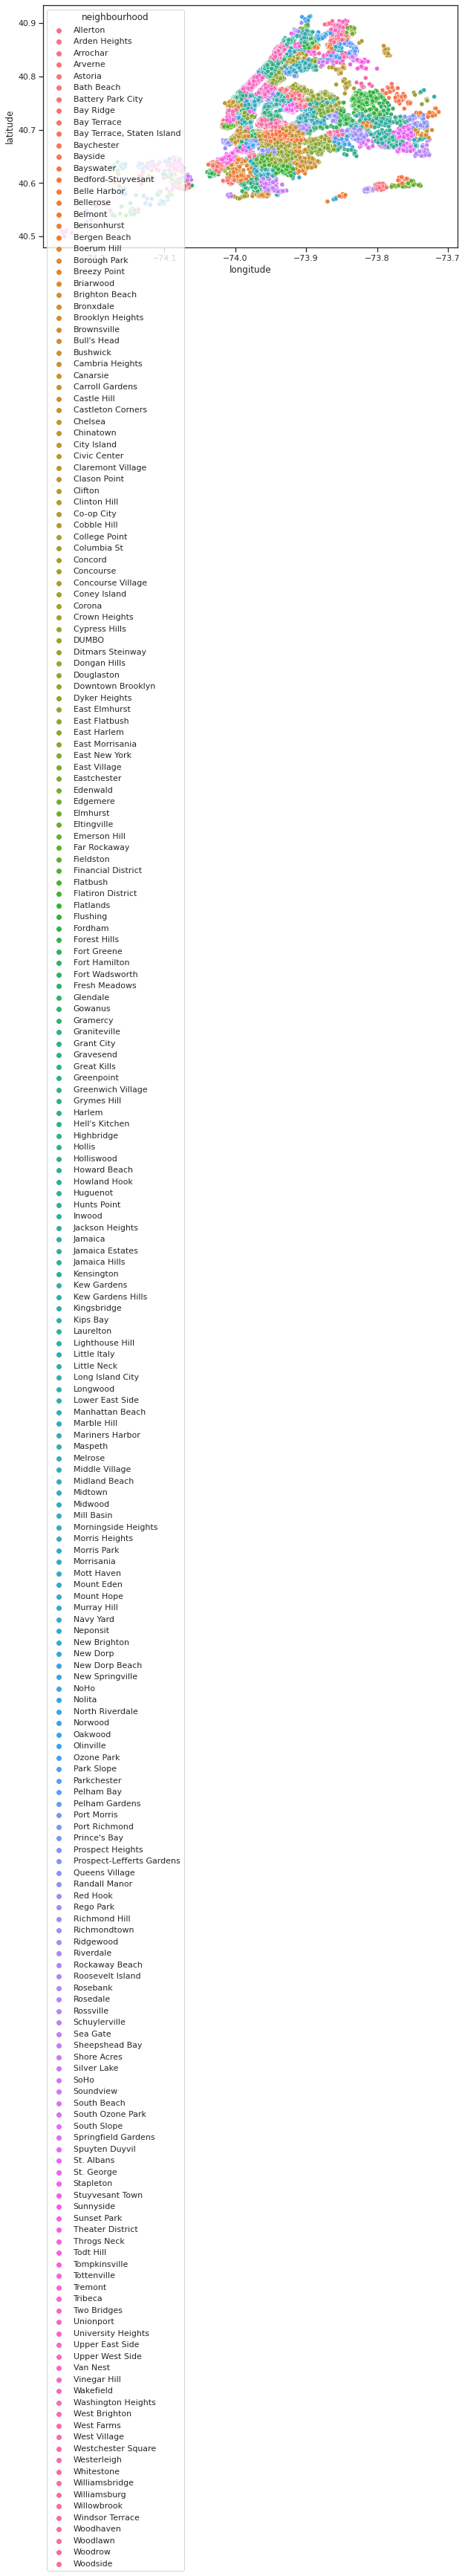

In [52]:
# Map of Neighbourhood
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood)
plt.ioff()

##### Aqui estamos observando en base a la latitud y longitud las diferentes propiedades por Neighbourhood.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



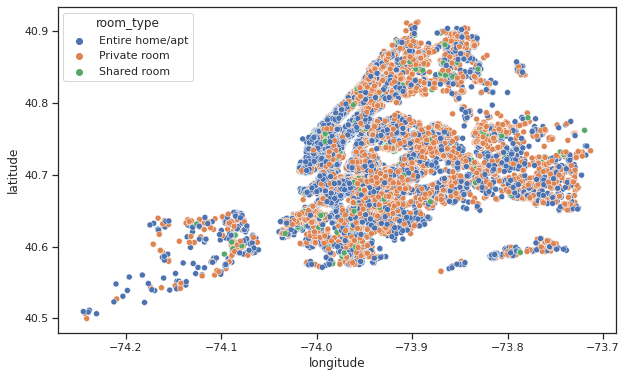

In [53]:
# mostrando los tipos de apartamentos en los diferentes barrios 
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.room_type)
plt.ioff()


##### aqui podemos observar como prediominan en todos los barrios los Entire home/apt y las private room.
##### Esto sería graficar lo que vimos en porcentajes arriba.